## Main Trends Visualization

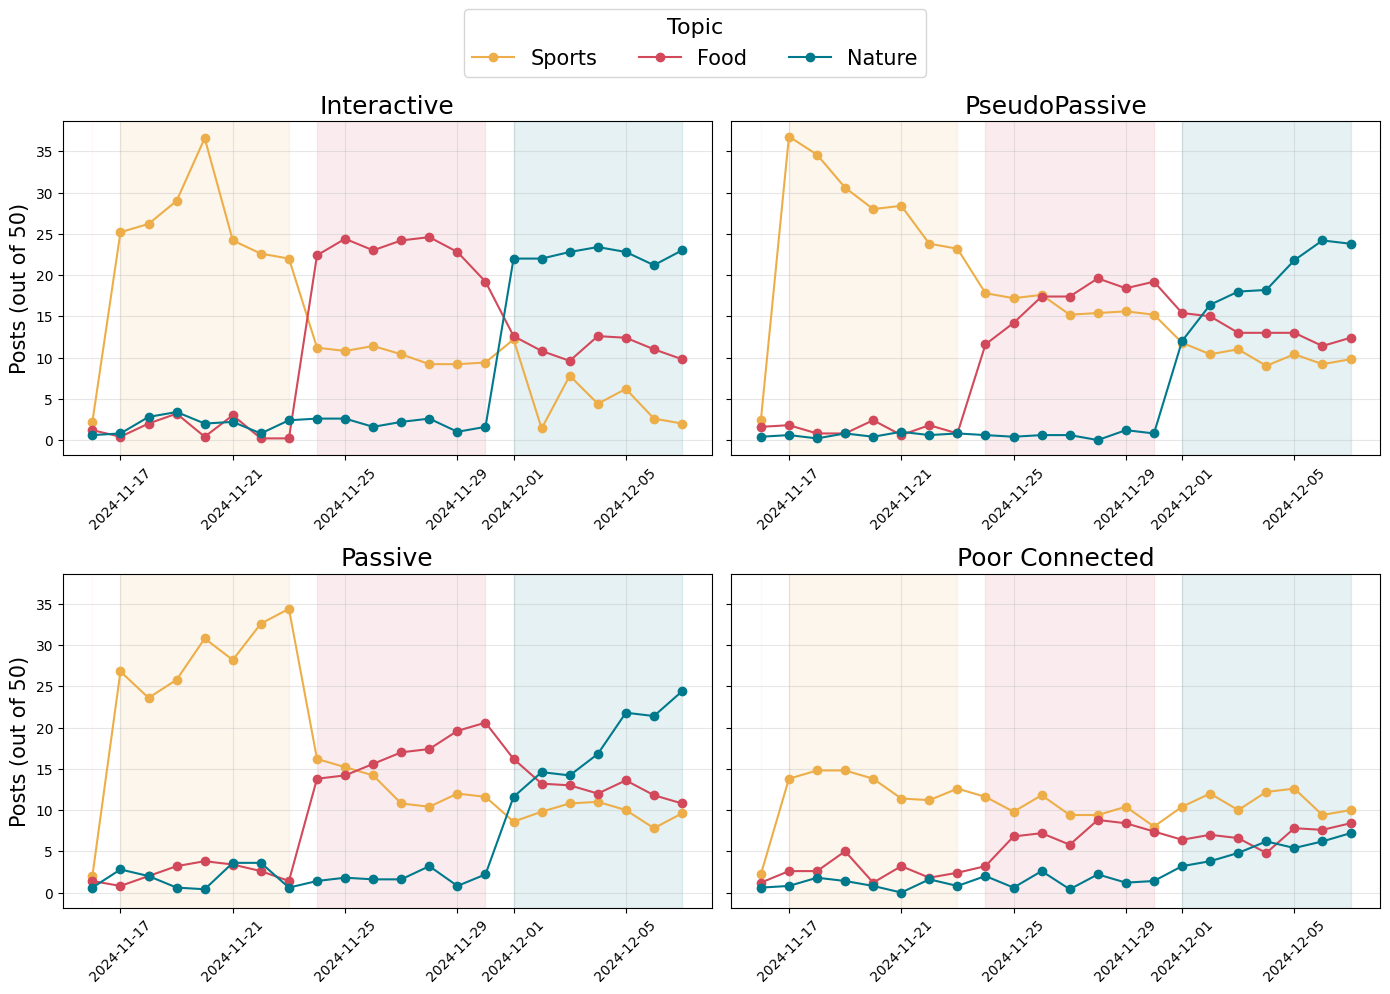

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load the dataset
data = pd.read_csv('Data.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y', errors='coerce')

# Check for any invalid dates
if data['Date'].isnull().any():
    print("Warning: Some dates could not be parsed. Check the input format.")

# Define pastel colors for weeks
pastel_colors = ['#FFB6C1', '#edae49', '#d1495b', '#00798c']

colors = {'Sports':'#edae49','Food':'#d1495b','Nature':'#00798c'}
# Define a function to calculate averages and plot data with week-based pastel backgrounds
def plot_average_posts_with_week_background(data, title):
    # Calculate daily averages per account type per topic
    avg_data = data.groupby(['Date', 'Account Type', 'Week'])[['Sports', 'Food', 'Nature']].mean().reset_index()

    # Unique account types for subplots
    account_types = data['Account Type'].unique()
    topics = ['Sports', 'Food', 'Nature']

    # Set up subplots (2 rows, 2 columns)
    fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)
    axes = axes.flatten()  # Flatten axes for easier indexing

    for i, account_type in enumerate(account_types):
        subset = avg_data[avg_data['Account Type'] == account_type]
        ax = axes[i]
        
        # Add pastel backgrounds for weeks
        weeks = subset['Week'].unique()
        for j, week in enumerate(weeks):
            week_data = subset[subset['Week'] == week]
            ax.axvspan(
                week_data['Date'].min(),
                week_data['Date'].max(),
                color=pastel_colors[j % len(pastel_colors)],
                alpha=0.1
            )
        
        # Plot lines for each topic
        for topic in topics:
            ax.plot(
                subset['Date'],
                subset[topic],
                label=topic,
                marker='o',
                color=colors[topic]
            )
        
        # Format each subplot
        ax.set_title(account_type, fontsize=18)
        # ax.set_xlabel('Date', fontsize=10)
        if i % 2 == 0:
            ax.set_ylabel('Posts (out of 50)', fontsize=15)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(alpha=0.3)
    
    # Common legend for all subplots
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, title="Topic", fontsize=15, title_fontsize=16)
    
    # Format the overall figure
    # fig.suptitle(title, fontsize=24)
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.savefig('Weekly Trends.png',dpi=300)
    plt.show()

# Call the function with your data
plot_average_posts_with_week_background(data, "Posts Per Topic By Account Type with Weekly Highlights")


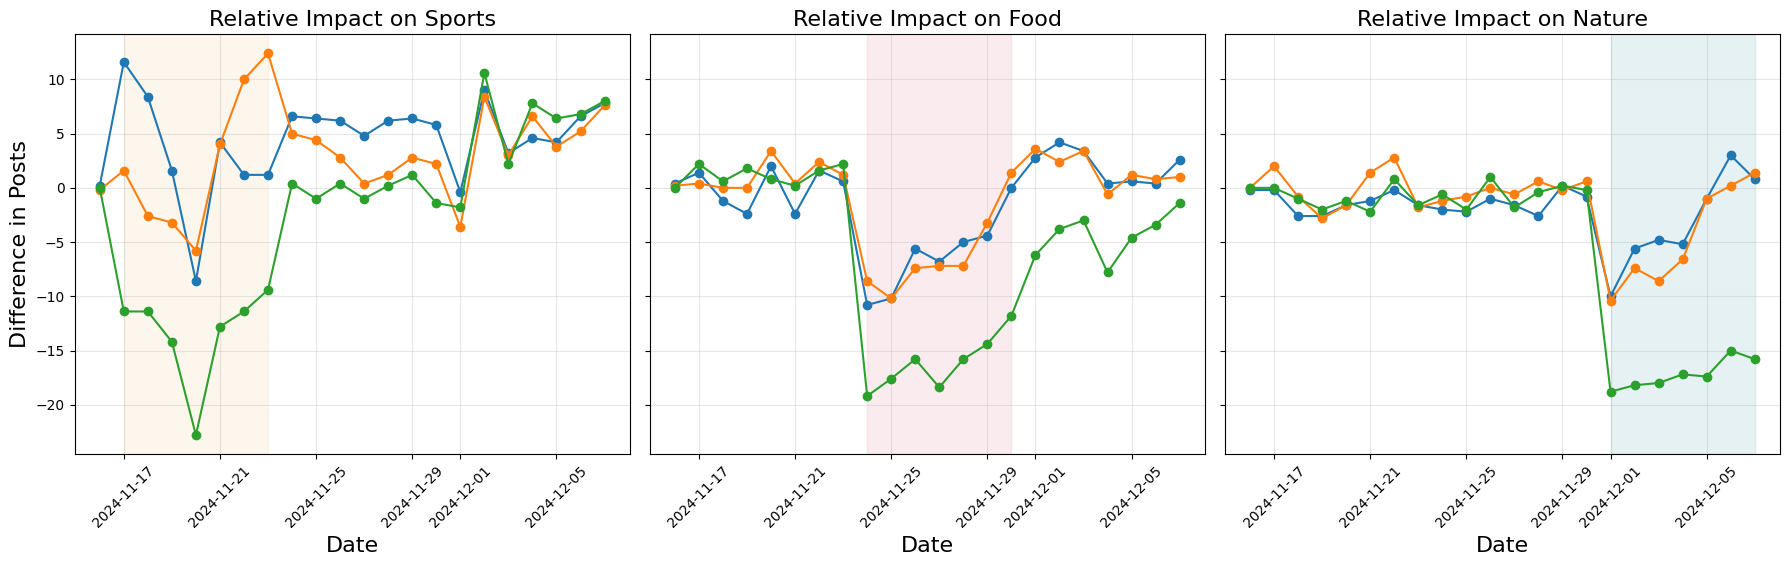

In [137]:
def plot_relative_impact_with_week_background(data, title):
    # Calculate daily averages per account type per topic
    avg_data = data.groupby(['Date', 'Account Type', 'Week'])[['Sports', 'Food', 'Nature']].mean().reset_index()

    # Separate averages for interactive accounts
    interactive_avg = avg_data[avg_data['Account Type'] == 'Interactive'].set_index('Date')

    # Account types to compare
    account_types = ['PseudoPassive', 'Passive', 'Poor Connected']

    # Define pastel colors for weeks
    pastel_colors = ['#FFB6C1', '#edae49', '#d1495b', '#00798c']

    colors = {'Sports':'#edae49','Food':'#d1495b','Nature':'#00798c'}

    # Set up subplots for topics
    topics = ['Sports', 'Food', 'Nature']
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    # Collect handles for the legend
    handles, labels = [], []

    for i, topic in enumerate(topics):
        ax = axes[i]
        
        # Add weekly background for specific topics
        if topic == 'Sports':
            week_subset = avg_data[(avg_data['Week'] == 1)]
        elif topic == 'Food':
            week_subset = avg_data[(avg_data['Week'] == 2)]
        elif topic == 'Nature':
            week_subset = avg_data[(avg_data['Week'] == 3)]
        else:
            week_subset = None

        if week_subset is not None:
            ax.axvspan(
                week_subset['Date'].min(),
                week_subset['Date'].max(),
                color=pastel_colors[(i + 1) % len(pastel_colors)],
                alpha=0.1
            )
        
        # Plot lines for differences with interactive accounts
        for account_type in account_types:
            # Get averages for the account type
            other_avg = avg_data[avg_data['Account Type'] == account_type].set_index('Date')

            # Calculate the difference with interactive accounts
            difference = other_avg[topic] - interactive_avg[topic]

            # Plot the difference
            line, = ax.plot(
                difference.index,
                difference.values,
                label=f'{account_type} vs Interactive',
                marker='o',
                
            )

            # Add handle and label to the common legend if not already added
            if account_type not in labels:
                handles.append(line)
                labels.append(f'{account_type} vs Interactive')
        
        # Format each subplot
        ax.set_title(f'Relative Impact on {topic}', fontsize=16)
        ax.set_xlabel('Date', fontsize=16)
        if i == 0:
            ax.set_ylabel('Difference in Posts', fontsize=16)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(alpha=0.3)
    
    # Common legend for all subplots
    # fig.legend(handles, labels, loc='upper center', ncol=len(account_types), title="Comparison", fontsize=16, bbox_to_anchor=(0.5, 0.95), title_fontsize=12)
    
    # Format the overall figure
    # fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('Relative_Impact_of_Interactive_Accounts.png', dpi=300)
    plt.show()

# Call the function with your data
plot_relative_impact_with_week_background(data, "Relative Impact of Interactive Accounts with Weekly Highlights")



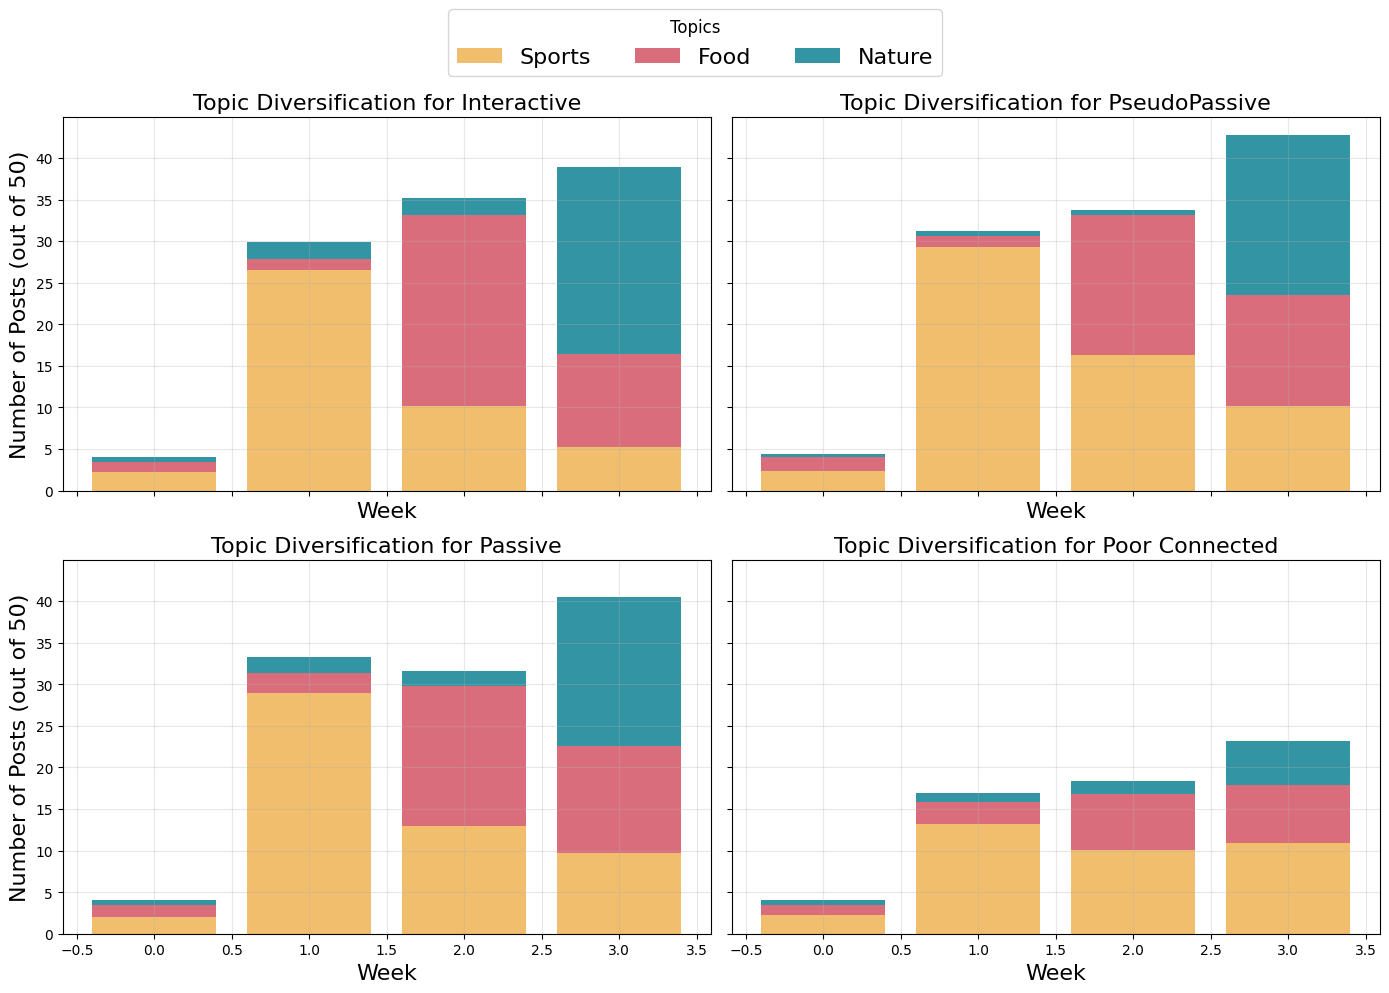

In [139]:
def plot_topic_diversification_weekly(data, title):
    # Calculate weekly averages per account type per topic
    weekly_avg_data = data.groupby(['Week', 'Account Type'])[['Sports', 'Food', 'Nature']].mean().reset_index()

    colors = {'Sports':'#edae49','Food':'#d1495b','Nature':'#00798c'}

    # Set up 2x2 subplots for each account type
    account_types = data['Account Type'].unique()
    fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
    axes = axes.flatten()  # Flatten axes for easier indexing

    for i, account_type in enumerate(account_types):
        if i >= len(axes):  # Ensure we don't exceed the number of subplots
            break

        subset = weekly_avg_data[weekly_avg_data['Account Type'] == account_type]

        # Plot stacked bar chart
        axes[i].bar(subset['Week'], subset['Sports'], label='Sports', color=colors['Sports'], bottom=None,alpha = 0.8,)
        axes[i].bar(subset['Week'], subset['Food'], label='Food', color=colors['Food'], bottom=subset['Sports'],alpha = 0.8,)
        axes[i].bar(
            subset['Week'],
            subset['Nature'],
            label='Nature',
            color=colors['Nature'],
            alpha = 0.8,
            bottom=subset['Sports'] + subset['Food']
        )

        # Format subplot
        axes[i].set_title(f'Topic Diversification for {account_type}', fontsize=16)
        axes[i].set_xlabel('Week', fontsize=16)
        if i % 2 == 0:
            axes[i].set_ylabel('Number of Posts (out of 50)', fontsize=16)
        axes[i].tick_params(axis='x', rotation=0)
        axes[i].grid(alpha=0.3)

    # Add shared legend and format overall figure
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=3, title="Topics", fontsize=16, bbox_to_anchor=(0.5, 1), title_fontsize = 12)
    # fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.savefig('Topic Diversification.png', dpi = 300)
    plt.show()

# Call the function with your data
plot_topic_diversification_weekly(data, "Weekly Topic Diversification Across Account Types")


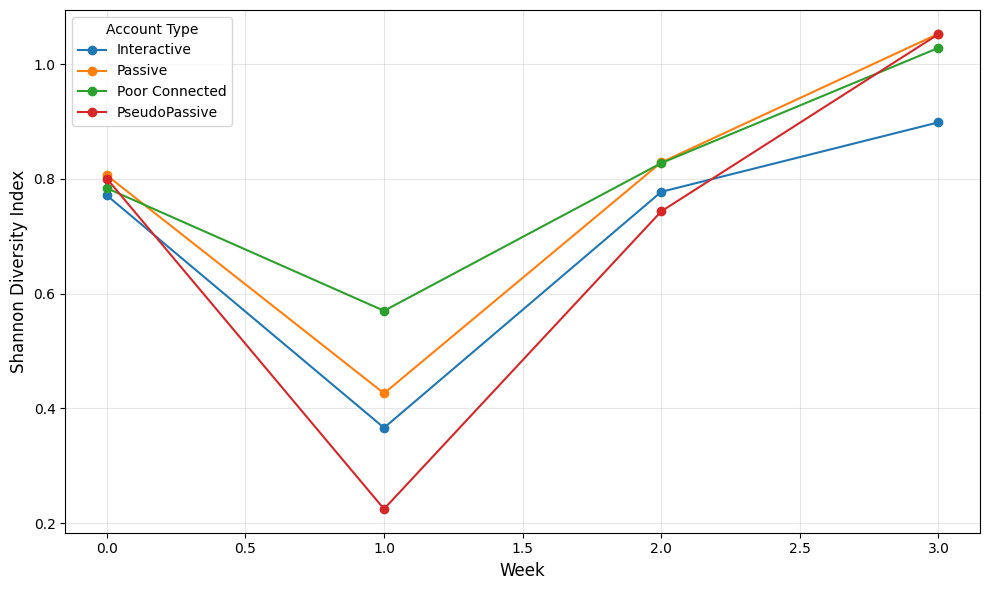

In [140]:
import numpy as np

def calculate_shannon_diversity(data):
    # Calculate topic proportions
    data['Total'] = data[['Sports', 'Food', 'Nature']].sum(axis=1)
    data['Sports_Prop'] = data['Sports'] / data['Total']
    data['Food_Prop'] = data['Food'] / data['Total']
    data['Nature_Prop'] = data['Nature'] / data['Total']

    # Calculate Shannon Diversity Index
    data['Shannon_Diversity'] = -(
        (data['Sports_Prop'] * np.log(data['Sports_Prop'] + 1e-10)) +
        (data['Food_Prop'] * np.log(data['Food_Prop'] + 1e-10)) +
        (data['Nature_Prop'] * np.log(data['Nature_Prop'] + 1e-10))
    )

    return data

def plot_shannon_diversity(data, title):
    # Calculate weekly average SDI by account type
    weekly_sdi = data.groupby(['Week', 'Account Type'])['Shannon_Diversity'].mean().reset_index()

    # Plot Shannon Diversity Index trends
    fig, ax = plt.subplots(figsize=(10, 6))
    for account_type in weekly_sdi['Account Type'].unique():
        subset = weekly_sdi[weekly_sdi['Account Type'] == account_type]
        ax.plot(subset['Week'], subset['Shannon_Diversity'], label=account_type, marker='o')

    # ax.set_title(title, fontsize=14)
    ax.set_xlabel('Week', fontsize=12)
    ax.set_ylabel('Shannon Diversity Index', fontsize=12)
    ax.legend(title="Account Type")
    ax.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('Shannon Diversity Index (Proof of Diversification).png',dpi=300)
    plt.show()

# Calculate Shannon Diversity Index and plot
data = calculate_shannon_diversity(data)
plot_shannon_diversity(data, "Shannon Diversity Index by Week and Account Type")


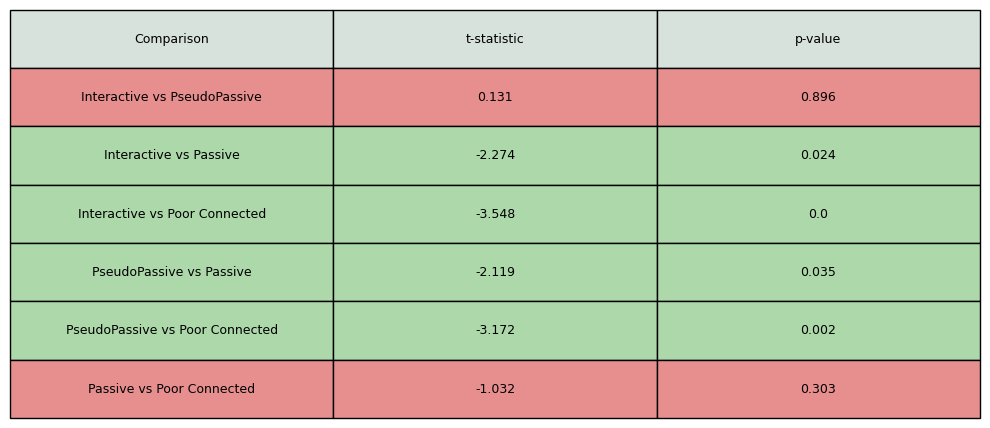

Results table saved to: T_Test_Results.csv


In [141]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table
from scipy.stats import ttest_ind

def t_test_sdi(data, account_type_1, account_type_2):
    # Subset data for the two account types
    sdi_1 = data[data['Account Type'] == account_type_1]['Shannon_Diversity']
    sdi_2 = data[data['Account Type'] == account_type_2]['Shannon_Diversity']

    # Perform t-test
    t_stat, p_val = ttest_ind(sdi_1, sdi_2, equal_var=False)
    return {'Comparison': f'{account_type_1} vs {account_type_2}', 
            't-statistic': round(t_stat, 3), 
            'p-value': round(p_val, 3)}

# Generate all combinations of account types
account_types = data['Account Type'].unique()
combinations = list(itertools.combinations(account_types, 2))

# Perform t-tests for all combinations
results = [t_test_sdi(data, combo[0], combo[1]) for combo in combinations]

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the results table to a CSV file
results_file_path = "T_Test_Results.csv"
results_df.to_csv(results_file_path, index=False)

# Function to plot the table with highlighted rows
def plot_results_table_highlighted(results_df, title):
    fig, ax = plt.subplots(figsize=(10, len(results_df) * 0.8))

    # Hide axes for a clean table-only display
    ax.axis('tight')
    ax.axis('off')

    # Create table
    table = Table(ax, bbox=[0, 0, 1, 1])

    # Add table rows
    n_cols = len(results_df.columns)
    n_rows = len(results_df)
    col_labels = results_df.columns
    cell_text = results_df.values

    # Add header row
    for col_idx, text in enumerate(col_labels):
        table.add_cell(-1, col_idx, width=1 / n_cols, height=0.15, text=text, loc='center', facecolor='#d8e2dc')

    # Add data rows with conditional formatting
    for row_idx, row in enumerate(cell_text):
        # Highlight based on p-value
        p_value = row[-1]  # p-value is the last column
        color = '#acd8aa' if p_value < 0.05 else '#e78f8e'

        for col_idx, cell in enumerate(row):
            table.add_cell(row_idx, col_idx, width=1 / n_cols, height=0.15, text=str(cell), loc='center', facecolor=color)

    # Add the table to the axis
    ax.add_table(table)

    # Add title
    # plt.title(title, fontsize=14)
    plt.tight_layout(rect=[0,0,1,0.92])
    plt.savefig('t-test results for Shannon Diversity Index.png', dpi=300)
    plt.show()

# Plot the table with highlighted rows
plot_results_table_highlighted(results_df, "T-Test Results for Shannon Diversity Index")

# Confirm the file was saved
print(f"Results table saved to: {results_file_path}")
